<b style="font-size:3rem">Tutorial on the Usage of `PyEquIon` for Aqueous Solution</b>

`PyEquIon` stands for Python package for Equilibrium calculation of Ionic Solutions. The main features are:

- Pure python package: hence it is easy to install in any platform
- Calculation of equilibrium of inorganic salts in water solution with precipitation
- Automatic determination of reactions
- Provides information as: Ionic Strength, pH, Electric Conductivity and the concentrations of each species as well their activity coefficient
- A modular approach for the activity coefficient calculation allows the usage of new thermodynamic models
- Just in time compilation capabilities with `numba`
- Automatic differentiation with `sympy`
- Code generation for exporting the residual function for a giving system to other environments: suitable for kinetic simulations
- Automatic determination of the mean activity coefficient (often used in comparison with experiments)

Its a work in progress and improvements are under the roadmap. Please, inform us if you find any bug or has a functionality suggestion.

The development source code is at the Gitlab repository: https://gitlab.com/scaling-group/pyequion .

A simplified version is provided with a web based user interface: https://caiofcm.github.io/pyequion-onl/

In this example a solution containing CaCO3 in water is considered. 

Contact: Caio Curitiba Marcellos - caiocuritiba@gmail.com

# Setup

Loading the pyequion module and setting the Jupyter notebook with the `mhchem` package to render the chemical reactions

In [1]:
#%load_ext vscode_debugger_magic
#%vscodedebugger

In [2]:
%load_ext autoreload
%autoreload 2
import os
os.environ['NUMBA_DISABLE_JIT'] = '1' #REMOVE ME
import pyequion
import numpy as np
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading mhchem module
$$\require{mhchem}$$ 

# Aqueous CaCO3 equilibrium

## Create Equilibrium with CaCO3 only

In [3]:
sys_eq = pyequion.create_equilibrium(
        feed_compounds=['CaCO3']
)

In [4]:
pyequion.display_reactions(sys_eq)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# Deveria aqui tambem mostrar reacoes na fase liquida e na fase solida

## Solve the Equilibrium for the aqueous CaCO3

### First Approach: solving without using a `EquilibriumSystem`

In this case the system will be created each time the function is called.

In [6]:
solution = pyequion.solve_solution(
        {'CaCO3': 10},
        TC=25.0)
pyequion.print_solution(solution)

Solution Results:
	pH = 10.78189 
	sc = 917.00200 uS/cm
	I = 13.13740 mmol/L
	DIC = 10.00000 mmol/L
Saturation Index:
	Calcite: 3.0697239312816347
	Aragonite: 2.9259540838893994
	Vaterite: 2.5032924370673353
Ionic Activity Product:
	Calcite: 3.889502510365769e-06
	Aragonite: 3.889502510365769e-06
	Vaterite: 3.889502510365769e-06
Precipitation concentration:
	Calcite: 0.0 mM
	Aragonite: 0.0 mM
	Vaterite: 0.0 mM


### Second Approach: solving using the created `EquilibriumSystem`

The step for determining the reactions is not required in this case, as it will use the provided `EquilibriumSystem`. It is the recommended case for further analysis.

In [7]:
solution = pyequion.solve_solution(
        {'CaCO3': 10},
        reaction_system=sys_eq,
        TC=25.0)
pyequion.print_solution(solution)

Solution Results:
	pH = 10.78189 
	sc = 917.00200 uS/cm
	I = 13.13740 mmol/L
	DIC = 10.00000 mmol/L
Saturation Index:
	Calcite: 3.0697239312816347
	Aragonite: 2.9259540838893994
	Vaterite: 2.5032924370673353
Ionic Activity Product:
	Calcite: 3.889502510365769e-06
	Aragonite: 3.889502510365769e-06
	Vaterite: 3.889502510365769e-06
Precipitation concentration:
	Calcite: 0.0 mM
	Aragonite: 0.0 mM
	Vaterite: 0.0 mM


 The equilibrium calculation shows that the aqueous solution is supersaturated (Saturaion Index > 1), hence one can evaluate the equilibrium with the precipitation of Calcite.

## Equlibrium with the solid phase

In [8]:
solution = pyequion.solve_solution(
        {'CaCO3': 10},
        reaction_system=sys_eq,
        TC=25.0, allow_precipitation=True)
pyequion.print_solution(solution)

            The software will equilibrate with the phase with higher saturation index.
                Is recommended to set the solid phases which should be equilibrated.
Solution Results:
	pH = 9.90679 
	sc = 38.53444 uS/cm
	I = 0.38562 mmol/L
	DIC = 0.12301 mmol/L
Saturation Index:
	Calcite: 0.0
	Aragonite: -0.1437698473922353
	Vaterite: -0.5664314942142994
Ionic Activity Product:
	Calcite: 3.312608598711612e-09
	Aragonite: 3.312608598711612e-09
	Vaterite: 3.312608598711612e-09
Precipitation concentration:
	Calcite: 9.876986204946162 mM
	Aragonite: 0.0 mM
	Vaterite: 0.0 mM


The calculation shows that calcite will precipitate and can form 9.88 mM of solid. A warning message is thrown to indicate the user that when solid equilibrium is concerned it is necessary caution. In this example the calcium carbonate polymorphs (Calcite, Aragonite and Vaterite) can be formed. However, it is known that in the equilibrium the most stable form is Calcite. 

The appropriate form to calculate the equilibrium with the solid phase in `PyEquIon` is to pass the solid phases for the equilibrium. When this information is not provided the program forces the equilibrium with the phase with higher Saturation Index, which in the previous case was calcite.

In the next example the phase Calcite is explicit defined to force the equilibrium

In [9]:
solution = pyequion.solve_solution(
        {'CaCO3': 10},
        reaction_system=sys_eq,
        TC=25.0, allow_precipitation=True,
        solid_equilibrium_phases=['Calcite'])
pyequion.print_solution(solution)

Solution Results:
	pH = 9.90679 
	sc = 38.53444 uS/cm
	I = 0.38562 mmol/L
	DIC = 0.12301 mmol/L
Saturation Index:
	Calcite: 0.0
	Aragonite: -0.1437698473922353
	Vaterite: -0.5664314942142994
Ionic Activity Product:
	Calcite: 3.312608598711612e-09
	Aragonite: 3.312608598711612e-09
	Vaterite: 3.312608598711612e-09
Precipitation concentration:
	Calcite: 9.876986204946162 mM
	Aragonite: 0.0 mM
	Vaterite: 0.0 mM


The results are the same as in the former case, as expected and the warning message is suppressed. 

One can evaluate a "pseudo-equilibrium" with other solid phase, for instance if all the calcium carbonate precipitates as Vaterite:

In [10]:
solution = pyequion.solve_solution(
        {'CaCO3': 10},
        reaction_system=sys_eq,
        TC=25.0, allow_precipitation=True,
        solid_equilibrium_phases=['Vaterite'])
pyequion.print_solution(solution)

Solution Results:
	pH = 10.07846 
	sc = 64.12184 uS/cm
	I = 0.68124 mmol/L
	DIC = 0.22246 mmol/L
Saturation Index:
	Calcite: 0.5664314942142994
	Aragonite: 0.4226616468220641
	Vaterite: 0.0
Ionic Activity Product:
	Calcite: 1.2206794098750213e-08
	Aragonite: 1.2206794098750213e-08
	Vaterite: 1.2206794098750213e-08
Precipitation concentration:
	Calcite: 0.0 mM
	Aragonite: 0.0 mM
	Vaterite: 9.777538281661505 mM


# Adding other Salts

In [11]:
sys_eq = pyequion.create_equilibrium(
        feed_compounds=['CaCO3', 'NaCl']
)
pyequion.display_reactions(sys_eq)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
solution = pyequion.solve_solution(
        {'CaCO3': 10, 'NaCl': 10},
        reaction_system=sys_eq,
        TC=25.0)
pyequion.print_solution(solution)

Solution Results:
	pH = 10.76484 
	sc = 2207.10199 uS/cm
	I = 24.37955 mmol/L
	DIC = 10.00000 mmol/L
Saturation Index:
	Calcite: 3.038878963981862
	Aragonite: 2.8951091165896266
	Vaterite: 2.4724474697675625
	Halite: -5.714937069355257
Ionic Activity Product:
	Calcite: 3.6228394549293544e-06
	Aragonite: 3.6228394549293544e-06
	Vaterite: 3.6228394549293544e-06
	Halite: 7.162471891780315e-05
Precipitation concentration:
	Calcite: 0.0 mM
	Aragonite: 0.0 mM
	Vaterite: 0.0 mM
	Halite: 0.0 mM


## Effects of NaCl in the mean activity Coefficient

The mean activity coeffient of a salt is often used for comparison with experimental data.

$$\gamma_{\pm}=\left(\gamma^p_A \gamma^q_B\right)^{1/{\left(p+q\right)}}$$

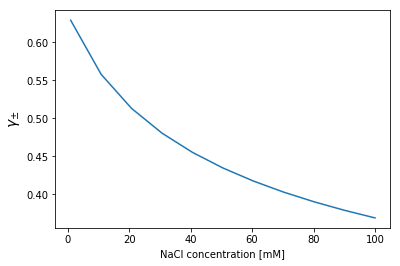

In [14]:
npts = 11
nacl_span = np.linspace(1.0, 100.0, npts) #mM of NaCl
solutions = [
    pyequion.solve_solution(
        {'CaCO3': 10, 'NaCl': cNaCl},
        reaction_system=sys_eq,
        TC=25.0)
    for cNaCl in nacl_span
]
gamma_mean = [pyequion.get_mean_activity_coeff(solution, 'CaCO3') for solution in solutions]
plt.figure()
plt.plot(nacl_span, gamma_mean)
plt.xlabel('NaCl concentration [mM]')
plt.ylabel('$\gamma_{\pm}$', fontsize=14);

##  Effects of NaCl in CaCO3 solubility

To calculate the solubility of a salt one can use the argument `calculate_solubility` with a tuple in the form `('solid-phase-name', 'input-salt-name')`. This is a working in progress and for now, the solid phase formula has to match the input salt name. Further tests and validation are necessary for this functionality.

The solubility calculation includes the precipitation reaction, but the amount precipitated is zero (aqueous phase saturated with the solid phase). In this case, a feed concentration is no longer fixed and is an unknown that will be obtained by the nonlinear system. This is why in the following function call only the NaCl concentration is provided (if a value for CaCO3 is assigned it will be just ignored).

In [15]:
solution = pyequion.solve_solution(
        {'NaCl': 10.0},
        reaction_system=sys_eq,
        TC=25.0,
        calculate_solubility=('Calcite', 'CaCO3')
        )
pyequion.print_solution(solution, False)

Solution Results:
	pH = 9.92006 
	sc = 1285.28052 uS/cm
	I = 10.49398 mmol/L
	DIC = 0.15617 mmol/L
Saturation Index:
	Calcite: 0.0
	Aragonite: -0.1437698473922353
	Vaterite: -0.5664314942142994
	Halite: -5.662203698269993
Ionic Activity Product:
	Calcite: 3.312608598711612e-09
	Aragonite: 3.312608598711612e-09
	Vaterite: 3.312608598711612e-09
	Halite: 8.087164958084089e-05
Precipitation concentration:
	Calcite: 0.0 mM
	Aragonite: 0.0 mM
	Vaterite: 0.0 mM
	Halite: 0.0 mM
Calculated Solubility (mM): 
	CaCO3: 0.1561676037585926


Now lets create a chart for the solubility of CaCO3 varying the NaCl concentration:

In [16]:
npts = 15
nacl_span = np.linspace(1.0, 6000.0, npts) #mM of NaCl
solutions = [
    pyequion.solve_solution(
        {'NaCl': cNaCl},
        reaction_system=sys_eq,
        TC=25.0,
        calculate_solubility=('Calcite', 'CaCO3')
        )
    for cNaCl in nacl_span
]

The solutions are calculated and stored in the collection solutions. In the next, we loop through the collection to get the calculated solubility of CaCO3 for each case (interface to be improved)

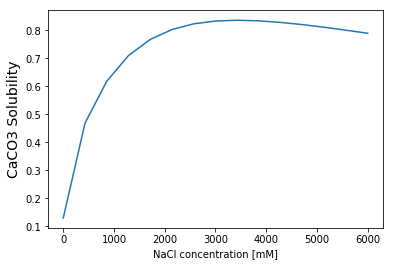

In [17]:
solubility = np.array([[*solution.calculated_solubility.values()][0] for solution in solutions])
plt.figure()
plt.plot(nacl_span, solubility*1e3)
plt.xlabel('NaCl concentration [mM]')
plt.ylabel('CaCO3 Solubility', fontsize=14);

## Comparing closed and open systems

In this section, we explain the "Closing Equation Types" and apply it to compare the CaCO3 system with atmospheric equilibrium (OPEN) and closed system.

There are three `ClosingEquationType`:

- NONE: solves the system based on the mass balance using the provided feed components concentrations;
- OPEN: uses the atmospheric CO2(g) partial pressure in the equilibrium
- CARBON_TOTAL: allows the addition of a extra parameter to vary the total carbon content in the equilibrium. This is useful for evaluate partial equilibrium, for instance when the system is open to the atmosphere but the CO2(g) equilibrium is not reached
- PH: to fix a constant PH value (FIXME)


### Solving for the open system - equilibrium with the atmospheric CO2(g)

FIXME: modify to allow setting the partial pressure

In [18]:
sys_eq = pyequion.create_equilibrium(
        feed_compounds=['CaCO3'],
        closing_equation_type=pyequion.ClosingEquationType.OPEN
)
pyequion.display_reactions(sys_eq)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [19]:
solutionOPEN = pyequion.solve_solution({'CaCO3': 10}, sys_eq)
pyequion.print_solution(solutionOPEN, True)

Solution Results:
	pH = 9.17483 
	sc = 1187.94972 uS/cm
	I = 19.20685 mmol/L
	DIC = 15.29555 mmol/L
Saturation Index:
	Calcite: 2.8184345194703866
	Aragonite: 2.6746646720781513
	Vaterite: 2.252003025256087
Ionic Activity Product:
	Calcite: 2.1807437894305804e-06
	Aragonite: 2.1807437894305804e-06
	Vaterite: 2.1807437894305804e-06
Precipitation concentration:
	Calcite: 0.0 mM
	Aragonite: 0.0 mM
	Vaterite: 0.0 mM
Concentrations [mM]:
	CaCO3: 3.6472657930926395 mM
	OH-: 0.017498599285033174 mM
	H+: 7.504652586499817e-07 mM
	Ca++: 5.901090003444618 mM
	CaOH+: 0.0009990849367163435 mM
	CO3--: 1.0519325506190607 mM
	HCO3-: 10.13246126029409 mM
	CO2: 0.01324766763740778 mM
	CaHCO3+: 0.4506451185260224 mM
	H2O: 1000.0 mM
	CO2(g): 794.3282347242815 mM
Activity Coefficients:
	CaCO3: 1.004432333940079
	OH-: 0.8689597479810582
	H+: 0.8909136333399563
	Ca++: 0.592573922122005
	CaOH+: 0.8726233911995992
	CO3--: 0.5928461127583083
	HCO3-: 0.877476499679337
	CO2: 1.004432333940079
	CaHCO3+: 0.8799409

### Solving for the closed system

In [20]:
sys_eq = pyequion.create_equilibrium(
        feed_compounds=['CaCO3'],
        closing_equation_type=pyequion.ClosingEquationType.NONE
)
pyequion.display_reactions(sys_eq)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [21]:
solutionCLOSED = pyequion.solve_solution({'CaCO3': 10}, sys_eq)
pyequion.print_solution(solutionCLOSED)

Solution Results:
	pH = 10.78189 
	sc = 917.00200 uS/cm
	I = 13.13740 mmol/L
	DIC = 10.00000 mmol/L
Saturation Index:
	Calcite: 3.0697239312816347
	Aragonite: 2.9259540838893994
	Vaterite: 2.5032924370673353
Ionic Activity Product:
	Calcite: 3.889502510365769e-06
	Aragonite: 3.889502510365769e-06
	Vaterite: 3.889502510365769e-06
Precipitation concentration:
	Calcite: 0.0 mM
	Aragonite: 0.0 mM
	Vaterite: 0.0 mM


### Solving for a user provided CARBON_TOTAL (in this case is the DIC):

With the open system condition, the calculated DIC (total amount of inorganic carbon) is 15.29555 mmol/L, while the total amount of carbon added from the feed is 10 mmol/L. Hence, at open system condition CO2(g) enters in the aqueous solution. 

Therefore, when the aqueous solution of CaCO3 is prepared it has DIC = 10 mmol/L and letting the solution for sufficient time with contact with the atmosphere the DIC will reach 15.295 mmol/L. One can be interested in predict how the pH will vary during this time.

For that, we can vary the `CARBON_TOTAL` from the closed system condition to the open system condition.


In [22]:
sys_eq = pyequion.create_equilibrium(
        feed_compounds=['CaCO3'],
        closing_equation_type=pyequion.ClosingEquationType.CARBON_TOTAL
)
pyequion.display_reactions(sys_eq)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [23]:
dicOPEN = solutionOPEN.DIC*1e3
dicCLOSED = solutionCLOSED.DIC*1e3
npts = 11
carbon_total_span = np.linspace(dicCLOSED, dicOPEN, npts)

solutions = [
    pyequion.solve_solution({'CaCO3': 10}, sys_eq, carbon_total=carb)
    for carb in carbon_total_span
]

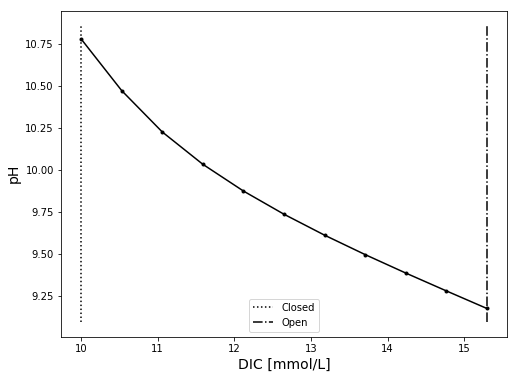

In [24]:
pH_span = [slt.pH for slt in solutions]
plt.figure(figsize=(8,6))
plt.plot(carbon_total_span, pH_span, '.-k')
plt.xlabel('DIC [mmol/L]', fontsize=14)
plt.ylabel('pH', fontsize=14)
ylims = plt.ylim()
plt.plot([carbon_total_span[0], carbon_total_span[0]], ylims, ':k', label='Closed')
plt.plot([carbon_total_span[-1], carbon_total_span[-1]], ylims, '-.k', label='Open')
plt.legend();

### Comparing amount precipitated in a closed and open system

Note that in this use case we are not passing a reaction_sys, hence the function `solve_solution` will create the reaction system before solving the equilibrium.

In [25]:
solutionOPEN = pyequion.solve_solution({'CaCO3': 10}, allow_precipitation=True,
    close_type=pyequion.ClosingEquationType.OPEN,
    solid_equilibrium_phases=['Calcite']
)
pyequion.print_solution(solutionOPEN)

Solution Results:
	pH = 8.21873 
	sc = 104.53823 uS/cm
	I = 1.57083 mmol/L
	DIC = 1.05684 mmol/L
Saturation Index:
	Calcite: 0.0
	Aragonite: -0.1437698473922353
	Vaterite: -0.5664314942142994
Ionic Activity Product:
	Calcite: 3.312608598711612e-09
	Aragonite: 3.312608598711612e-09
	Vaterite: 3.312608598711612e-09
Precipitation concentration:
	Calcite: 9.470047419092538 mM
	Aragonite: 0.0 mM
	Vaterite: 0.0 mM


In [26]:
solutionCLOSED = pyequion.solve_solution({'CaCO3': 10}, allow_precipitation=True,
    close_type=pyequion.ClosingEquationType.NONE,
    solid_equilibrium_phases=['Calcite']
)
pyequion.print_solution(solutionCLOSED)

Solution Results:
	pH = 9.90679 
	sc = 38.53444 uS/cm
	I = 0.38562 mmol/L
	DIC = 0.12301 mmol/L
Saturation Index:
	Calcite: 0.0
	Aragonite: -0.1437698473922353
	Vaterite: -0.5664314942142994
Ionic Activity Product:
	Calcite: 3.312608598711612e-09
	Aragonite: 3.312608598711612e-09
	Vaterite: 3.312608598711612e-09
Precipitation concentration:
	Calcite: 9.876986204946162 mM
	Aragonite: 0.0 mM
	Vaterite: 0.0 mM


In [27]:
print(f"""
    Therefore, for the open system the pH={solutionOPEN.pH:.2f} and the pH for closed system is {solutionCLOSED.pH:.2f}
    
    At closed system the amount precipitated is slightly higher: calcite(open)/calcite(closed) = {solutionCLOSED.pH/solutionOPEN.pH:.2f}
    """ )


    Therefore, for the open system the pH=8.22 and the pH for closed system is 9.91
    
    At closed system the amount precipitated is slightly higher: calcite(open)/calcite(closed) = 1.21
    


### Manipulating the partial CO2(g) Pressure 

For that, first create a OPEN equilibrium system and than pass the `co2_partial_pressure` in atm. The default value is the atmospheric CO2(g) pressure

In [30]:
sys_eq = pyequion.create_equilibrium(
        feed_compounds=[],
        closing_equation_type=pyequion.ClosingEquationType.OPEN,
)
pyequion.display_reactions(sys_eq)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [31]:
# solution = pyequion.solve_solution({'CaCO3': 10}, sys_eq,
#    co2_partial_pressure=0.001, 
#    allow_precipitation=True,
#    solid_equilibrium_phases=['Calcite']
# )
solution = pyequion.solve_solution(None, sys_eq,
   co2_partial_pressure=pyequion.pCO2_ref,
    fugacity_calculation='pr'
)
pyequion.print_solution(solution, True)

Solution Results:
	pH = 5.61352 
	sc = 0.96056 uS/cm
	I = 0.00244 mmol/L
	DIC = 0.01574 mmol/L
Saturation Index:
	: nan
Ionic Activity Product:
	: nan
Precipitation concentration:
	: nan mM
Concentrations [mM]:
	OH-: 4.164534519198937e-06 mM
	H+: 0.002439333423187577 mM
	CO2: 0.01330634981946581 mM
	HCO3-: 0.0024350745706880456 mM
	CO3--: 4.7158990165386626e-08 mM
	H2O: 1000.0 mM
	CO2(g): 794.3282347242815 mM
Activity Coefficients:
	OH-: 0.9981697793552219
	H+: 0.9981749163530294
	CO2: 1.0000005616882943
	HCO3-: 0.9981715572206775
	CO3--: 0.9927062636604492
	H2O: 1.0000005616882943
	CO2(g): 0.00039084006071018747


In [32]:
npts = 20
pCO2_span = np.linspace(pyequion.pCO2_ref, 250, npts)
solutions = [
    pyequion.solve_solution(None, sys_eq,
        co2_partial_pressure=pCO2,
        fugacity_calculation='pr'
#        allow_precipitation=True,
#        solid_equilibrium_phases=['Calcite']
    )
    for pCO2 in pCO2_span
]

Text(0, 0.5, 'CO2(g) Solubility')

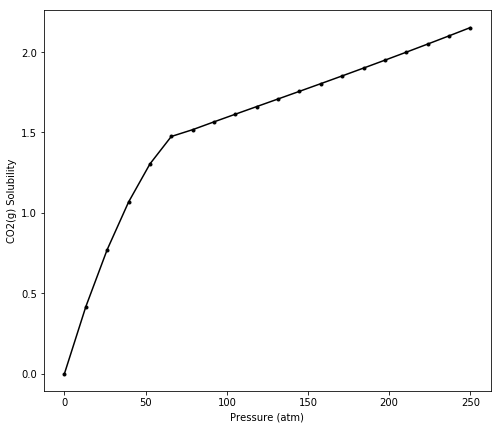

In [33]:
co2_molals = [slt.concentrations['CO2'] for slt in solutions]
plt.figure(figsize=(8,7))
plt.plot(pCO2_span, co2_molals, '.-k')
plt.xlabel('Pressure (atm)')
plt.ylabel('CO2(g) Solubility')

### System with CaCO3 at high Pressure

In [34]:
sys_eq = pyequion.create_equilibrium(
        feed_compounds=['CaCO3'],
        closing_equation_type=pyequion.ClosingEquationType.OPEN,
)
pyequion.display_reactions(sys_eq)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [35]:
npts = 20
# pCO2_span = np.linspace(pyequion.pCO2_ref, 50, npts)
pCO2_span = np.linspace(1, 50, npts)
solutions = [
    pyequion.solve_solution(
        {'CaCO3': 10}, sys_eq,
        co2_partial_pressure=pCO2,
        fugacity_calculation='pr'
#        allow_precipitation=True,
#        solid_equilibrium_phases=['Calcite']
    )
    for pCO2 in pCO2_span
]

Text(0, 0.5, 'CO2 Solubility [mM]')

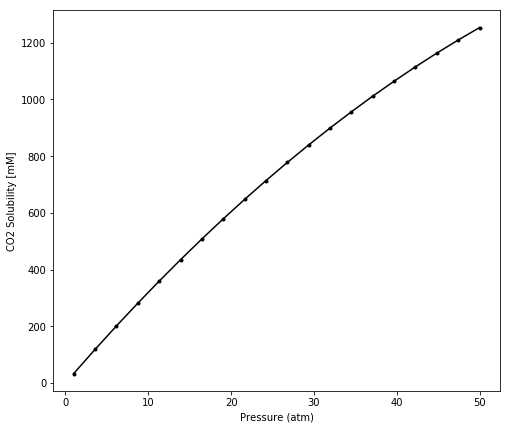

In [36]:
co2_molals = [slt.concentrations['CO2']*1e3 for slt in solutions]
plt.figure(figsize=(8,7))
plt.plot(pCO2_span, co2_molals, '.-k')
plt.xlabel('Pressure (atm)')
plt.ylabel('CO2 Solubility [mM]')

In [37]:
pyequion.print_solution(solutions[0], True)

Solution Results:
	pH = 6.02869 
	sc = 1690.74621 uS/cm
	I = 27.67031 mmol/L
	DIC = 53.63765 mmol/L
Saturation Index:
	Calcite: 0.07315347851173115
	Aragonite: -0.07061636888050415
	Vaterite: -0.49327801570256824
Ionic Activity Product:
	Calcite: 3.920338822637446e-09
	Aragonite: 3.920338822637446e-09
	Vaterite: 3.920338822637446e-09
Precipitation concentration:
	Calcite: 0.0 mM
	Aragonite: 0.0 mM
	Vaterite: 0.0 mM
Concentrations [mM]:
	CaCO3: 0.006543950816972441 mM
	OH-: 1.2822216869173277e-05 mM
	H+: 0.0010671025531598407 mM
	Ca++: 8.837150170577562 mM
	CaOH+: 1.009740772734993e-06 mM
	CO3--: 0.001483490761150718 mM
	HCO3-: 18.82869351857458 mM
	CO2: 33.64462540016819 mM
	CaHCO3+: 1.1563048688646962 mM
	H2O: 1000.0 mM
	CO2(g): 794.3282347242815 mM
Activity Coefficients:
	CaCO3: 1.0063916636951127
	OH-: 0.8486814664832565
	H+: 0.8772057974477598
	Ca++: 0.5468842837395173
	CaOH+: 0.8539986088018358
	CO3--: 0.5468032402411656
	HCO3-: 0.8599194455548311
	CO2: 1.0063916636951127
	CaHCO3+

In [38]:
pyequion.print_solution(solutions[-1], True)

Solution Results:
	pH = 4.45856 
	sc = 1705.56707 uS/cm
	I = 27.72040 mmol/L
	DIC = 1273.67531 mmol/L
Saturation Index:
	Calcite: -1.4958672311777068
	Aragonite: -1.6396370785699421
	Vaterite: -2.062298725392006
Ionic Activity Product:
	Calcite: 1.0575548314633079e-10
	Aragonite: 1.0575548314633079e-10
	Vaterite: 1.0575548314633079e-10
Precipitation concentration:
	Calcite: 0.0 mM
	Aragonite: 0.0 mM
	Vaterite: 0.0 mM
Concentrations [mM]:
	CaCO3: 0.00017652828737796982 mM
	OH-: 3.4505543987420176e-07 mM
	H+: 0.039661945188562676 mM
	Ca++: 8.840436133333935 mM
	CaOH+: 2.7171311281492066e-08 mM
	CO3--: 4.003750143443735e-05 mM
	HCO3-: 18.879841130176814 mM
	CO2: 1253.635864627619 mM
	CaHCO3+: 1.1593873112073725 mM
	H2O: 1000.0 mM
	CO2(g): 794.3282347242815 mM
Activity Coefficients:
	CaCO3: 1.0064032713008693
	OH-: 0.8485757386255468
	H+: 0.8771361256227881
	Ca++: 0.5466561772827286
	CaOH+: 0.8539026959855366
	CO3--: 0.5465727496751643
	HCO3-: 0.8598288121042963
	CO2: 1.0064032713008693
	C

Hence, considering the equlibrium at 50 bar, the despressurization to 1 bar can release:

In [39]:
sCO2_50bar = solutions[-1].concentrations['CO2']*1e3
sCO2_1bar = solutions[0].concentrations['CO2']*1e3
delta_CO2_50_to_1 = sCO2_50bar - sCO2_1bar
print(f'Molality of CO2 released from 50 bar to 1 bar: {delta_CO2_50_to_1:.4f} mM')

Molality of CO2 released from 50 bar to 1 bar: 1219.9912 mM


In [40]:
slt = pyequion.solve_solution(
        {'CaCO3': 10},
        close_type=pyequion.ClosingEquationType.OPEN,
        co2_partial_pressure=50,
        fugacity_calculation='ideal'
)
pyequion.print_solution(slt, True)

Solution Results:
	pH = 4.32877 
	sc = 1710.56459 uS/cm
	I = 27.73310 mmol/L
	DIC = 1711.49412 mmol/L
Saturation Index:
	Calcite: -1.62544029370331
	Aragonite: -1.7692101410955452
	Vaterite: -2.1918717879176093
Ionic Activity Product:
	Calcite: 7.84747301808655e-11
	Aragonite: 7.84747301808655e-11
	Vaterite: 7.84747301808655e-11
Precipitation concentration:
	Calcite: 0.0 mM
	Aragonite: 0.0 mM
	Vaterite: 0.0 mM
Concentrations [mM]:
	CaCO3: 0.0001309905527222509 mM
	OH-: 2.5592363076349487e-07 mM
	H+: 0.05347813187837061 mM
	Ca++: 8.839863639332346 mM
	CaOH+: 2.0149149038995873e-08 mM
	CO3--: 2.9717642960302885e-05 mM
	HCO3-: 18.89315108944843 mM
	CO2: 1691.4408012106012 mM
	CaHCO3+: 1.1600053499657876 mM
	H2O: 1000.0 mM
	CO2(g): 794.3282347242815 mM
Activity Coefficients:
	CaCO3: 1.0064062158001514
	OH-: 0.8485489410180334
	H+: 0.8771184696037169
	Ca++: 0.5465983780788007
	CaOH+: 0.8538783881850801
	CO3--: 0.5465143452499815
	HCO3-: 0.8598058417769454
	CO2: 1.0064062158001514
	CaHCO3+: 

TypeError: solve_solution() got an unexpected keyword argument 'co2_partial_ressure'